In [1]:
first_name = 'Claire'
last_name = 'Hutin'

Write a Python program to scrape the housing price data (house and apartment) of several cities in Nord (59) region of France. Process and present the data using a dashboard and map.

Important Python libraries:
- BeautifulSoup
- selenium
- pandas

Note:
- For web scraping exercise, make sure to always stay anonymous (i.e. do not log in to the website) and only scrape the website public content.
- In addition, do not disture the website by setting an unreasonable high scraping rate.
- Check the robots.txt of the website before scraping.

'- Collect data: BeautifulSoup, selenium. Target website: leboncoin.fr. Target city: Lille (59000, 59800, 59160, 59260).
- Process data: Pandas
- Present data: Free to choose

In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
import plotly.express as px

In [6]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver import Chrome
import numpy as np

In [15]:
#Define Chrome Path
chrome_path = "C:/Users/hutin/Desktop/chromedriver.exe"
driver = Chrome(chrome_path)

In [22]:
#Get the Bienici.com URL
MAX_Page_num=11
MAX_PAGE_DIG=3
for i in range(1, MAX_Page_num + 1):
    page_num= (MAX_PAGE_DIG - len(str(i))) * "0" + str(i)
    urls= "https://www.bienici.com/recherche/achat/fives-59000,lille-59800,59160,59260"

driver.get(urls)

In [24]:
#From Page 1 one the website, obtain the main information for each property that is on sale and store them in dataframes.
main = driver.find_elements_by_xpath("""//span[@class="generatedTitleWithHighlight"]""")
mainlist=[]
citylist=[]
pricelist=[]
for i in main:
    x=i.text
    mainlist.append(x)

    
city = driver.find_elements_by_xpath("""//div[@class="cityAndDistrict"]""")
for i in city:
    y=i.text
    citylist.append(y)

price = driver.find_elements_by_xpath("""//span[@class="thePrice"]""")
for i in price:
    z=i.text
    pricelist.append(z)    
    

main_df=pd.DataFrame(mainlist)
city_df=pd.DataFrame(citylist)
price_df=pd.DataFrame(pricelist)
price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 1 columns):
0    52 non-null object
dtypes: object(1)
memory usage: 496.0+ bytes


In [25]:
#Change the price dataframe and clean it.
price_df.columns=["Price"]

price_df['Price']=price_df['Price'].replace('','0')
price_df['Price'].unique()
price_df = price_df.drop(price_df[price_df['Price']=='0'].index)

price_df.index= pd.RangeIndex(start=0, stop=26, step=1)

In [26]:
#Obtain the main df of the first page.
main_df.columns=["Main"]
city_df.columns=["City"]
main_df['Price']=price_df["Price"]
main_df['City']=city_df['City']
main_df.head()

,Main,Price,City
0,Maison 4 pièces 83 m²,270 000 €,Lomme 59160
1,Appartement 5 pièces 114 m²,270 000 €,Lille 59000 (Lille-Sud)
2,Maison 6 pièces 246 m²,99 736 €,Lille 59000 (Vauban - Esquermes)
3,Maison 6 pièces 96 m²,37 100 €,Lille 59000 (Vauban - Esquermes)
4,Appartement 3 pièces 62 m²,213 000 €,Lille 59000 (Sud Marais)


In [ ]:
#PAGE 2 (All previous steps have been repeated for pages 1-4)

In [32]:
#Get the Bienici.com URL
MAX_Page_num=11
MAX_PAGE_DIG=3
for i in range(1, MAX_Page_num + 1):
    page_num= (MAX_PAGE_DIG - len(str(i))) * "0" + str(i)
    url= "https://www.bienici.com/recherche/achat/fives-59000,lille-59800,59160,59260?page=2"

driver.get(url)

main1 = driver.find_elements_by_xpath("""//span[@class="generatedTitleWithHighlight"]""")
mainlist1=[]
citylist1=[]
pricelist1=[]
for i in main1:
    x=i.text
    mainlist1.append(x)

    
city1 = driver.find_elements_by_xpath("""//div[@class="cityAndDistrict"]""")
for i in city1:
    y=i.text
    citylist1.append(y)

price1 = driver.find_elements_by_xpath("""//span[@class="thePrice"]""")
for i in price1:
    z=i.text
    pricelist1.append(z)    
    

main_df1=pd.DataFrame(mainlist1)
city_df1=pd.DataFrame(citylist1)
price_df1=pd.DataFrame(pricelist1)
price_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
0    48 non-null object
dtypes: object(1)
memory usage: 464.0+ bytes


In [33]:
price_df1.columns=["Price"]

price_df1['Price']=price_df1['Price'].replace('','0')
price_df1['Price'].unique()
price_df1 = price_df1.drop(price_df1[price_df1['Price']=='0'].index)

price_df1.index= pd.RangeIndex(start=0, stop=24, step=1)

main_df1.columns=["Main"]
city_df1.columns=["City"]
main_df1['Price']=price_df1["Price"]
main_df1['City']=city_df1['City']
main_df1.head()

,Main,Price,City
0,Appartement 4 pièces 63 m²,325 000 €,Lille 59000 (Centre-ville - Euralille)
1,Appartement 3 pièces 65 m²,239 177 €,Lomme 59160 (Mont à Camp - Marais)
2,Maison 8 pièces 200 m²,588 200 €,Lille 59000 (Wazemmes)
3,Appartement 3 pièces 53 m²,222 600 €,Lille 59000 (Saint-Maurice - Pellevoisin)
4,Appartement 3 pièces 68 m²,196 500 €,Lille 59800 (Saint-Maurice - Pellevoisin)


In [ ]:
#PAGE 3

In [36]:
#Get the Bienici.com URL
MAX_Page_num=11
MAX_PAGE_DIG=3
for i in range(1, MAX_Page_num + 1):
    page_num= (MAX_PAGE_DIG - len(str(i))) * "0" + str(i)
    url= "https://www.bienici.com/recherche/achat/fives-59000,lille-59800,59160,59260?page=3"

driver.get(url)

main2 = driver.find_elements_by_xpath("""//span[@class="generatedTitleWithHighlight"]""")
mainlist2=[]
citylist2=[]
pricelist2=[]
for i in main2:
    x=i.text
    mainlist2.append(x)

    
city2 = driver.find_elements_by_xpath("""//div[@class="cityAndDistrict"]""")
for i in city2:
    y=i.text
    citylist2.append(y)

price2 = driver.find_elements_by_xpath("""//span[@class="thePrice"]""")
for i in price2:
    z=i.text
    pricelist2.append(z)    
    

main_df2=pd.DataFrame(mainlist2)
city_df2=pd.DataFrame(citylist2)
price_df2=pd.DataFrame(pricelist2)
price_df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
0    48 non-null object
dtypes: object(1)
memory usage: 464.0+ bytes


In [37]:
price_df2.columns=["Price"]

price_df2['Price']=price_df2['Price'].replace('','0')
price_df2['Price'].unique()

price_df2 = price_df2.drop(price_df2[price_df2['Price']=='0'].index)

price_df2.index= pd.RangeIndex(start=0, stop=24, step=1)



In [38]:
main_df2.columns=["Main"]
city_df2.columns=["City"]
main_df2['Price']=price_df2["Price"]
main_df2['City']=city_df2['City']
main_df2.head()

,Main,Price,City
0,Appartement 4 pièces 85 m²,295 000 €,Lille 59000 (Centre-ville - Euralille)
1,Appartement 3 pièces 58 m²,286 000 €,Lille 59800 (Vieux Lille)
2,Appartement 2 pièces 36 m²,101 000 €,Lille 59000 (Vauban - Esquermes)
3,Appartement 3 pièces 53 m²,125 000 €,Lille 59000 (Fives)
4,Appartement 2 pièces 69 m²,174 900 €,Lille 59000 (Saint-Maurice - Pellevoisin)


In [ ]:
#PAGE 4

In [40]:
#Get the Bienici.com URL
MAX_Page_num=11
MAX_PAGE_DIG=3
for i in range(1, MAX_Page_num + 1):
    page_num= (MAX_PAGE_DIG - len(str(i))) * "0" + str(i)
    url= "https://www.bienici.com/recherche/achat/fives-59000,lille-59800,59160,59260?page=4"

driver.get(url)

main3 = driver.find_elements_by_xpath("""//span[@class="generatedTitleWithHighlight"]""")
mainlist3=[]
citylist3=[]
pricelist3=[]
for i in main3:
    x=i.text
    mainlist3.append(x)

    
city3 = driver.find_elements_by_xpath("""//div[@class="cityAndDistrict"]""")
for i in city3:
    y=i.text
    citylist3.append(y)

price3 = driver.find_elements_by_xpath("""//span[@class="thePrice"]""")
for i in price3:
    z=i.text
    pricelist3.append(z)    
    

main_df3=pd.DataFrame(mainlist3)
city_df3=pd.DataFrame(citylist3)
price_df3=pd.DataFrame(pricelist3)
#price_df3.info()


price_df3.columns=["Price"]

price_df3['Price']=price_df3['Price'].replace('','0')
price_df3['Price'].unique()
price_df3 = price_df3.drop(price_df3[price_df3['Price']=='0'].index)

price_df3.index= pd.RangeIndex(start=0, stop=24, step=1)

main_df3.columns=["Main"]
city_df3.columns=["City"]
main_df3['Price']=price_df3["Price"]
main_df3['City']=city_df3['City']
main_df3.head()

,Main,Price,City
0,Appartement 3 pièces 67 m²,263 000 €,Lille 59000 (Centre-ville - Euralille)
1,Maison 7 pièces 250 m²,576 000 €,Lomme 59160 (Bourg - Délivrance)
2,Appartement 2 pièces 44 m²,235 000 €,Lille 59000 (Vieux Lille)
3,Appartement 2 pièces 47 m²,144 750 €,Lille 59000 (Moulins)
4,Appartement 2 pièces 47 m²,165 000 €,Lille 59000 (Lille-Sud)


In [41]:
main_final=main_df.append(main_df1)
main_final.index= pd.RangeIndex(start=0, stop=50, step=1)
main_final.head()

,Main,Price,City
0,Maison 4 pièces 83 m²,270 000 €,Lomme 59160
1,Appartement 5 pièces 114 m²,270 000 €,Lille 59000 (Lille-Sud)
2,Maison 6 pièces 246 m²,99 736 €,Lille 59000 (Vauban - Esquermes)
3,Maison 6 pièces 96 m²,37 100 €,Lille 59000 (Vauban - Esquermes)
4,Appartement 3 pièces 62 m²,213 000 €,Lille 59000 (Sud Marais)


In [42]:
main_final1=main_final.append(main_df2)
main_final1.index= pd.RangeIndex(start=0, stop=74, step=1)
main_final1.head()

,Main,Price,City
0,Maison 4 pièces 83 m²,270 000 €,Lomme 59160
1,Appartement 5 pièces 114 m²,270 000 €,Lille 59000 (Lille-Sud)
2,Maison 6 pièces 246 m²,99 736 €,Lille 59000 (Vauban - Esquermes)
3,Maison 6 pièces 96 m²,37 100 €,Lille 59000 (Vauban - Esquermes)
4,Appartement 3 pièces 62 m²,213 000 €,Lille 59000 (Sud Marais)


In [43]:
main_final2=main_final1.append(main_df3)
main_final2.index= pd.RangeIndex(start=0, stop=98, step=1)
main_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
Main     98 non-null object
Price    98 non-null object
City     98 non-null object
dtypes: object(3)
memory usage: 2.4+ KB


In [44]:
main_final2["City"].unique()

array(['Lomme 59160', 'Lille 59000 (Lille-Sud)',
       'Lille 59000 (Vauban - Esquermes)', 'Lille 59000 (Sud Marais)',
       'Lille 59800 (Vieux Lille)',
       'Hellemmes-Lille 59260 (Hellemmes Centre-ville - Pavé du Moulin)',
       'Lille 59000 (Mont à Camp - Marais)',
       'Lille 59000 (Saint-Maurice - Pellevoisin)',
       'Lille 59000 (Centre-ville - Euralille)',
       'Lille 59000 (Hellemmes Guinguette)', 'Capinghem 59160',
       'Lille 59000 (Moulins)',
       'Lille 59260 (Hellemmes Centre-ville - Pavé du Moulin)',
       'Lille 59800 (Fives)', 'Lille 59160 (Hellemmes Guinguette)',
       'Hellemmes-Lille 59260 (Centre-ville - Euralille)',
       'Lille 59000 (Bois Blanc)', 'Lomme 59160 (Mont à Camp - Marais)',
       'Lille 59000 (Wazemmes)',
       'Lille 59800 (Saint-Maurice - Pellevoisin)',
       'Lomme 59160 (Mitterie)', 'Lille (Wazemmes)',
       'Lille 59800 (Lille-Sud)', 'Lille 59160 (Sud Marais)',
       'Lille 59000 (Fives)', 'Lille 59800 (Vauban - Esquermes)'

In [45]:

#Turn the Cities and Neighborhoods into Dummies
main_final2['Lille_Fives'] = pd.np.where(main_final2.City.str.contains("Fives"), 1,0)
main_final2["Lille_Wazemmes"]=pd.np.where(main_final2.City.str.contains("Wazemmes"), 1,0)
main_final2["Lille_Vauban"]=pd.np.where(main_final2.City.str.contains("Vauban"), 1,0)
main_final2["Lille_Sud"]=pd.np.where(main_final2.City.str.contains("Sud"), 1,0)
main_final2["Hellemmes"]=pd.np.where(main_final2.City.str.contains("Hellemmes"), 1,0)
main_final2["Lille_Marais"]=pd.np.where(main_final2.City.str.contains("Marais"), 1,0)
main_final2["Vieux_Lille"]=pd.np.where(main_final2.City.str.contains("Vieux Lille"), 1,0)
main_final2["Lille_Saint_Maurice"]=pd.np.where(main_final2.City.str.contains("Pellevoisin"), 1,0)
main_final2["Lille_Euralille"]=pd.np.where(main_final2.City.str.contains("Euralille"), 1,0)
main_final2["Hellemmes_Guinguettes"]=pd.np.where(main_final2.City.str.contains("Guinguette"), 1,0)
main_final2["Capinghem"]=pd.np.where(main_final2.City.str.contains("Capinghem"), 1,0)
main_final2["Bois Blanc"]=pd.np.where(main_final2.City.str.contains("Bois Blanc"), 1,0)
main_final2["Lomme"]=pd.np.where(main_final2.City.str.contains("Lomme"), 1,0)

main_final2

,Main,Price,City,Lille_Fives,Lille_Wazemmes,Lille_Vauban,Lille_Sud,Hellemmes,Lille_Marais,Vieux_Lille,Lille_Saint_Maurice,Lille_Euralille,Hellemmes_Guinguettes,Capinghem,Bois Blanc,Lomme
0,Maison 4 pièces 83 m²,270 000 €,Lomme 59160,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Appartement 5 pièces 114 m²,270 000 €,Lille 59000 (Lille-Sud),0,0,0,1,0,0,0,0,0,0,0,0,0
2,Maison 6 pièces 246 m²,99 736 €,Lille 59000 (Vauban - Esquermes),0,0,1,0,0,0,0,0,0,0,0,0,0
3,Maison 6 pièces 96 m²,37 100 €,Lille 59000 (Vauban - Esquermes),0,0,1,0,0,0,0,0,0,0,0,0,0
4,Appartement 3 pièces 62 m²,213 000 €,Lille 59000 (Sud Marais),0,0,0,1,0,1,0,0,0,0,0,0,0
5,Appartement 2 pièces 44 m²,86 530 €,Lille 59800 (Vieux Lille),0,0,0,0,0,0,1,0,0,0,0,0,0
6,Maison 5 pièces 101 m²,59 039 €,Lille 59000 (Vauban - Esquermes),0,0,1,0,0,0,0,0,0,0,0,0,0
7,Maison 3 pièces 68 m²,127 000 €,Hellemmes-Lille 59260 (Hellemmes Centre-ville ...,0,0,0,0,1,0,0,0,0,0,0,0,0
8,Appartement 3 pièces 69 m²,149 475 €,Lille 59000 (Mont à Camp - Marais),0,0,0,0,0,1,0,0,0,0,0,0,0
9,Appartement 3 pièces 66 m²,176 000 €,Lille 59000 (Saint-Maurice - Pellevoisin),0,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
#Turn the House type into dummy

main_final2['type_Maison'] = pd.np.where(main_final2.Main.str.contains("Maison"), 1,0)
main_final2["type_Appartement"]=pd.np.where(main_final2.Main.str.contains("Appartement"), 1,0)
main_final2["type_Studio"]=pd.np.where(main_final2.Main.str.contains("Studio"), 1,0)

In [ ]:
main_final2.head()

In [47]:
main_final2[['room','size']] = main_final2.Main.apply( 
   lambda x: pd.Series(str(x).split("pièces"))) 


#Extract number in the room and size columns 
main_final2["room"]=main_final2.room.str.extract('(\d+)')
main_final2.head()

,Main,Price,City,Lille_Fives,Lille_Wazemmes,Lille_Vauban,Lille_Sud,Hellemmes,Lille_Marais,Vieux_Lille,...,Lille_Euralille,Hellemmes_Guinguettes,Capinghem,Bois Blanc,Lomme,type_Maison,type_Appartement,type_Studio,room,size
0,Maison 4 pièces 83 m²,270 000 €,Lomme 59160,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,83 m²
1,Appartement 5 pièces 114 m²,270 000 €,Lille 59000 (Lille-Sud),0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,5,114 m²
2,Maison 6 pièces 246 m²,99 736 €,Lille 59000 (Vauban - Esquermes),0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,6,246 m²
3,Maison 6 pièces 96 m²,37 100 €,Lille 59000 (Vauban - Esquermes),0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,6,96 m²
4,Appartement 3 pièces 62 m²,213 000 €,Lille 59000 (Sud Marais),0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,3,62 m²


In [48]:
#Extract superficy of the house
main_final2["size"]=main_final2["size"].replace("","0")
main_final2["size"] =main_final2["size"] .str[:-3]
main_final2["size"]=main_final2["size"].fillna(0)
main_final2["size"].unique()

array([' 83', ' 114', ' 246', ' 96', ' 62', ' 44', ' 101', ' 68', ' 69',
       ' 66', ' 84', ' 50', ' 42', ' 49', ' 135', ' 93', ' 105', ' 161',
       ' 63', 0, '', ', 85 ', ' 77', ' 120', ' 65', ' 200', ' 53', ' 81',
       ' 38', ' 73', ', 50 ', ' 48', ' 31', ' 70', ' 86', ' 36', ' 58',
       ' 215', ' 85', ' 45', ' 425', ' 140', ' 72', ' 100', ' 40', ' 55',
       ' 54', ' 67', ' 250', ' 47', ' 64', ' 92', ' 78', ' 90', ' 97',
       ' 80', ' 60'], dtype=object)

In [138]:
def undummy(d):
    return d.columns[d.values.argmax(1)]

main_final2.assign(Type=main_final2.filter(regex='^type').pipe(undummy))

main_final2

,Main,Price,City,Lille_Fives,Lille_Wazemmes,Lille_Vauban,Lille_Sud,Hellemmes,Lille_Marais,Vieux_Lille,...,Lille_Euralille,Hellemmes_Guinguettes,Capinghem,Bois Blanc,Lomme,type_Maison,type_Appartement,type_Studio,room,size
0,Maison 4 pièces 83 m²,270 000,Lomme 59160,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,83
1,Appartement 5 pièces 114 m²,270 000,Lille 59000 (Lille-Sud),0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,5,114
2,Maison 6 pièces 246 m²,99 736,Lille 59000 (Vauban - Esquermes),0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,6,246
3,Maison 6 pièces 96 m²,37 100,Lille 59000 (Vauban - Esquermes),0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,6,96
4,Appartement 3 pièces 62 m²,213 000,Lille 59000 (Sud Marais),0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,3,62
5,Appartement 2 pièces 44 m²,86 530,Lille 59800 (Vieux Lille),0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,2,44
6,Maison 5 pièces 101 m²,59 039,Lille 59000 (Vauban - Esquermes),0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,5,101
7,Maison 3 pièces 68 m²,127 000,Hellemmes-Lille 59260 (Hellemmes Centre-ville ...,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,3,68
8,Appartement 3 pièces 69 m²,149 475,Lille 59000 (Mont à Camp - Marais),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,3,69
9,Appartement 3 pièces 66 m²,176 000,Lille 59000 (Saint-Maurice - Pellevoisin),0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,66


In [145]:
main_final2["Price"].unique()

array(['270 000', '99 736', '37 100', '213 000', '86 530', '59 039',
       '127 000', '149 475', '176 000', '61 000', '325 000', '140 000',
       '196 541', '159 000', '137 000', '540 000', '306 000', '299 800',
       '436 000', '147 000', '142 920', '186 000 à 375 000', '320 000',
       '351 000', '239 000', '239 177', '588 200', '222 600', '196 500',
       '249 000', '103 684', '241 000', '141 000 à 265 800',
       '208 500 à 299 000', '231 500 à 233 000', '254 000', '210 500',
       '139 500', '129 000', '330 000', '113 900', '160 000', '199 500',
       '127 425', '177 000', '98 000', '142 500', '760 000', '295 000',
       '286 000', '101 000', '125 000', '174 900', '165 000', '2 279 000',
       '130 000', '625 000', '149 000', '502 577', '181 000', '205 000',
       '161 979', '190 000', '167 000', '181 771', '286 000 à 300 000',
       '159 750', '204 000', '222 450', '188 000', '222 000', '263 000',
       '576 000', '235 000', '144 750', '248 575', '30 000', '199 000',

In [72]:
main_final2["Price"] =main_final2["Price"].str[:-2]

In [96]:
#import re
#main_final["Price"]=main_final2["Price"].replace(" ","")
#main_final["Price"]=re.sub(r"\s+", "", main_final["Price"], flags=re.UNICODE)
main_final2["Price"].unique()
#main_final2["Price"].astype(int)
#pd.to_numeric(main_final2["Price"])#.astype(str).astype(int)

array(['270 000', '99 736', '37 100', '213 000', '86 530', '59 039',
       '127 000', '149 475', '176 000', '61 000', '325 000', '140 000',
       '196 541', '159 000', '137 000', '540 000', '306 000', '299 800',
       '436 000', '147 000', '142 920', '186 000 à 375 000', '320 000',
       '351 000', '239 000', '239 177', '588 200', '222 600', '196 500',
       '249 000', '103 684', '241 000', '141 000 à 265 800',
       '208 500 à 299 000', '231 500 à 233 000', '254 000', '210 500',
       '139 500', '129 000', '330 000', '113 900', '160 000', '199 500',
       '127 425', '177 000', '98 000', '142 500', '760 000', '295 000',
       '286 000', '101 000', '125 000', '174 900', '165 000', '2 279 000',
       '130 000', '625 000', '149 000', '502 577', '181 000', '205 000',
       '161 979', '190 000', '167 000', '181 771', '286 000 à 300 000',
       '159 750', '204 000', '222 450', '188 000', '222 000', '263 000',
       '576 000', '235 000', '144 750', '248 575', '30 000', '199 000',

In [112]:
main_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
Main                     98 non-null object
Price                    98 non-null object
City                     98 non-null object
Lille_Fives              98 non-null int32
Lille_Wazemmes           98 non-null int32
Lille_Vauban             98 non-null int32
Lille_Sud                98 non-null int32
Hellemmes                98 non-null int32
Lille_Marais             98 non-null int32
Vieux_Lille              98 non-null int32
Lille_Saint_Maurice      98 non-null int32
Lille_Euralille          98 non-null int32
Hellemmes_Guinguettes    98 non-null int32
Capinghem                98 non-null int32
Bois Blanc               98 non-null int32
Lomme                    98 non-null int32
type_Maison              98 non-null int32
type_Appartement         98 non-null int32
type_Studio              98 non-null int32
room                     98 non-null object
size                     98 non-n

In [117]:
main_final2.apply(pd.Series.value_counts)

,Main,Price,City,Lille_Fives,Lille_Wazemmes,Lille_Vauban,Lille_Sud,Hellemmes,Lille_Marais,Vieux_Lille,...,Lille_Euralille,Hellemmes_Guinguettes,Capinghem,Bois Blanc,Lomme,type_Maison,type_Appartement,type_Studio,room,size
0,NaN,NaN,NaN,91.0,93.0,91.0,87.0,89.0,87.0,89.0,...,79.0,96.0,97.0,97.0,85.0,81.0,29.0,97.0,NaN,8.0
1,NaN,NaN,NaN,7.0,5.0,7.0,11.0,9.0,11.0,9.0,...,19.0,2.0,1.0,1.0,13.0,17.0,69.0,1.0,NaN,NaN
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [126]:
#fig = px.bar(main_final2, x='Lille_Fives', y='Price')
#fig.show()

import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=main_final2['City'],
            y=main_final2['Price'],
           ))

fig.show()

In [129]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=main_final2['size'], y=main_final2['room'])],
    layout=go.Layout(
        title=go.layout.Title(text="Size per room")
    )
)
fig.show()

In [137]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=main_final2['size'],
            y=main_final2['Price'],
           ))

fig.show()

In [125]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=main_final2['room'], y=main_final2['City'])],
    layout=go.Layout(
        title=go.layout.Title(text="A Bar Chart")
    )
)
fig.show()

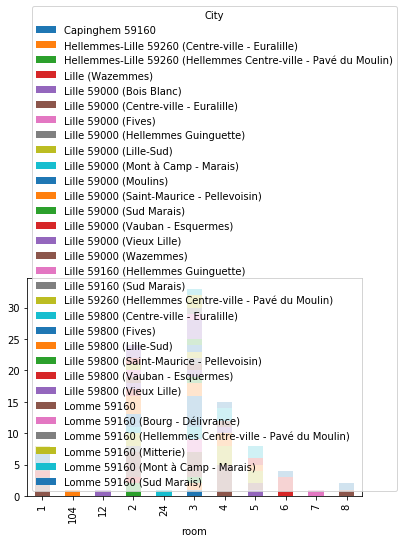

AttributeError: 'NoneType' object has no attribute 'ax'

In [124]:
import matplotlib.pyplot as plt


# a simple line plot
main_final2.groupby(['room','City']).size().unstack().plot(kind='bar',  stacked=True)
plt.show().ax.get_legend().remove()